In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Dataset Creation
data = {
    'ID': range(1, 21),
    'Age': [25, 30, 45, 35, 50, 40, 28, 32, 60, 55, 23, 47, 36, 29, 53, 49, 41, 65, 27, 31],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male',
               'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'East', 'West', 'South', 'North', 'East',
               'West', 'South', 'North', 'East', 'South', 'West', 'North', 'South', 'East', 'North'],
    'Symptoms': ['Cough', 'Headache', 'Fever', 'Fatigue', 'Cough', 'Nausea', 'Fatigue', 'Fever', 'Cough', 'Headache',
                 'Fatigue', 'Fever', 'Cough', 'Nausea', 'Headache', 'Fever', 'Fatigue', 'Cough', 'Headache', 'Fever'],
    'Diagnosis': ['Flu', 'Migraine', 'COVID-19', 'Anemia', 'Flu', 'Food Poisoning', 'Anemia', 'COVID-19', 'Flu', 'Migraine',
                  'Anemia', 'COVID-19', 'Flu', 'Food Poisoning', 'Migraine', 'COVID-19', 'Anemia', 'Flu', 'Migraine', 'COVID-19'],
    'Treatment_Plan': ['Medication', 'Therapy', 'Isolation', 'Diet', 'Medication', 'Diet', 'Diet', 'Isolation', 'Medication', 'Therapy',
                       'Diet', 'Isolation', 'Medication', 'Diet', 'Therapy', 'Isolation', 'Diet', 'Medication', 'Therapy', 'Isolation'],
    'Outcome': ['Recovered', 'Improved', 'Recovered', 'Not Improved', 'Recovered', 'Improved', 'Not Improved', 'Recovered', 'Improved', 'Recovered',
                'Improved', 'Recovered', 'Not Improved', 'Improved', 'Recovered', 'Not Improved', 'Improved', 'Recovered', 'Improved', 'Recovered']
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('ID', inplace=True)

# Display the first few rows of the dataset
print("First few rows of the dataset:\n")
df.head()

First few rows of the dataset:



,Age,Gender,Region,Symptoms,Diagnosis,Treatment_Plan,Outcome
ID,,,,,,,
1,25,Male,North,Cough,Flu,Medication,Recovered
2,30,Female,South,Headache,Migraine,Therapy,Improved
3,45,Female,East,Fever,COVID-19,Isolation,Recovered
4,35,Male,West,Fatigue,Anemia,Diet,Not Improved
5,50,Male,North,Cough,Flu,Medication,Recovered


In [11]:
# Step 3: Data Cleaning
# Checking for missing values
print("Missing values:\n")
df.isnull().sum()

Missing values:



,0
Age,0
Gender,0
Region,0
Symptoms,0
Diagnosis,0
Treatment_Plan,0
Outcome,0
Success,0


In [12]:
# Checking for duplicates
print("\nDuplicates found:\n")
df.duplicated().sum()


Duplicates found:



0

In [8]:
# Step 4: Data Analysis
# Common Diagnoses by Region
region_diagnosis = df.groupby(['Region', 'Diagnosis']).size().unstack().fillna(0)
print("\nDiagnoses by Region:\n", region_diagnosis)

# Treatment Plan Success Rates
success_outcome = df['Outcome'].apply(lambda x: 1 if x in ['Recovered', 'Improved'] else 0)
df['Success'] = success_outcome
success_rate = df.groupby('Treatment_Plan')['Success'].mean()
print("\nTreatment Success Rates:\n", success_rate)

# Demographics for Specific Conditions (e.g., COVID-19)
covid_demo = df[df['Diagnosis'] == 'COVID-19'][['Age', 'Gender']]
print("\nCOVID-19 Patient Demographics:\n", covid_demo)


Diagnoses by Region:
 Diagnosis  Anemia  COVID-19  Flu  Food Poisoning  Migraine
Region                                                    
East          0.0       1.0  0.0             2.0       2.0
North         1.0       1.0  4.0             0.0       0.0
South         0.0       2.0  1.0             0.0       2.0
West          3.0       1.0  0.0             0.0       0.0

Treatment Success Rates:
 Treatment_Plan
Diet          0.666667
Isolation     0.800000
Medication    0.800000
Therapy       1.000000
Name: Success, dtype: float64

COVID-19 Patient Demographics:
     Age  Gender
ID             
3    45  Female
8    32  Female
12   47    Male
16   49    Male
20   31  Female


<Figure size 1000x600 with 0 Axes>

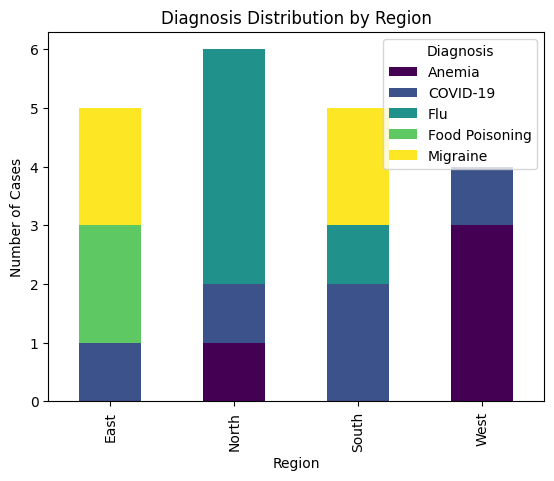

In [13]:
# Step 5: Data Visualization
# Bar chart for Diagnosis frequency by Region
plt.figure(figsize=(10, 6))
region_diagnosis.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Diagnosis Distribution by Region')
plt.ylabel('Number of Cases')
plt.xlabel('Region')
plt.legend(title='Diagnosis')
plt.show()

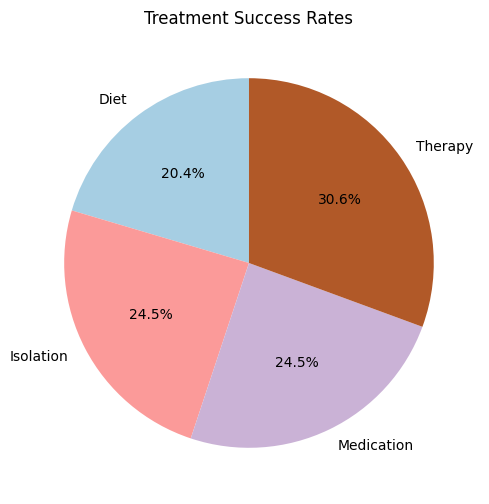

In [14]:
# Pie chart for Treatment Success Rates
plt.figure(figsize=(6, 6))
success_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Paired')
plt.title('Treatment Success Rates')
plt.ylabel('')
plt.show()

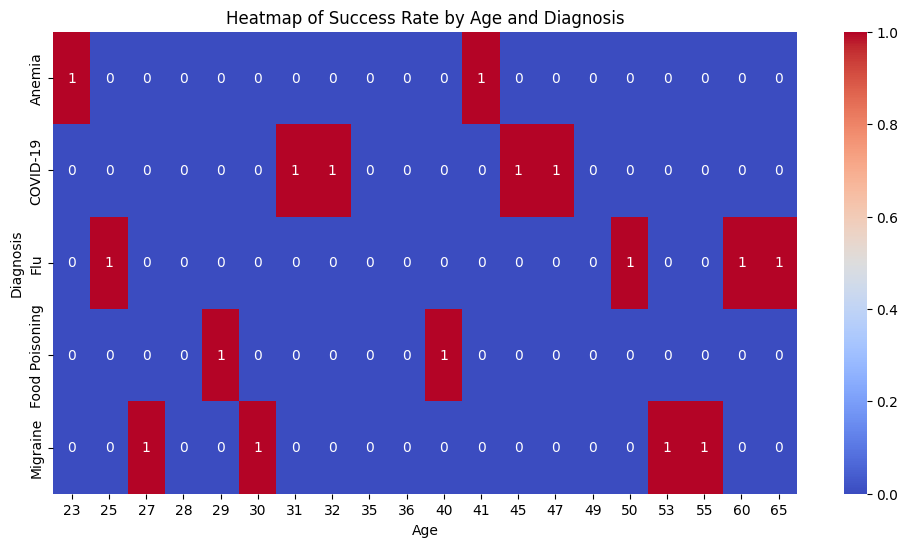

In [15]:
# Heatmap for Age and Success Rate by Diagnosis
heatmap_data = df.pivot_table(values='Success', index='Diagnosis', columns='Age', aggfunc='mean').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Success Rate by Age and Diagnosis')
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.show()

In [16]:
# Step 6: Advanced Analytics - Predictive Model
# Preparing the data
X = df[['Age', 'Treatment_Plan', 'Diagnosis']].copy()
X = pd.get_dummies(X, columns=['Treatment_Plan', 'Diagnosis'], drop_first=True)
y = df['Success']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Step 7: Final Report Summary
print("\nFinal Summary:")
print("1. Diagnosis Distribution by Region:\n", region_diagnosis)
print("\n2. Treatment Success Rates:\n", success_rate)
print("\n3. Predictive Model Accuracy:", accuracy)


Final Summary:
1. Diagnosis Distribution by Region:
 Diagnosis  Anemia  COVID-19  Flu  Food Poisoning  Migraine
Region                                                    
East          0.0       1.0  0.0             2.0       2.0
North         1.0       1.0  4.0             0.0       0.0
South         0.0       2.0  1.0             0.0       2.0
West          3.0       1.0  0.0             0.0       0.0

2. Treatment Success Rates:
 Treatment_Plan
Diet          0.666667
Isolation     0.800000
Medication    0.800000
Therapy       1.000000
Name: Success, dtype: float64

3. Predictive Model Accuracy: 0.75
